# Classification Algorithm

Classification is predicting something is one thing or another

Architecture of classification
* Binary Classfication and 
* Multiclass Classification

Input layer shape (in_features)


In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import matplotlib.cm

## 1. Make classification data and get it ready


In [2]:
import sklearn
from sklearn.datasets import make_circles

RANDOM_SEED = 42
# Make 1000 samples
n_samples = 1000

#create circles
X, y = make_circles(n_samples, noise=0.03, random_state=RANDOM_SEED)

print(f"First 5 samples of X \n: {X[:5]}")
print(f"First 5 samples of y \n: {y[:5]}")

First 5 samples of X 
: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y 
: [1 1 1 1 0]


In [3]:
import pandas as pd

circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:, 1]})

circles.head(5)

,X1,X2
0,0.754246,0.231481
1,-0.756159,0.153259
2,-0.815392,0.173282
3,-0.393731,0.692883
4,0.442208,-0.896723


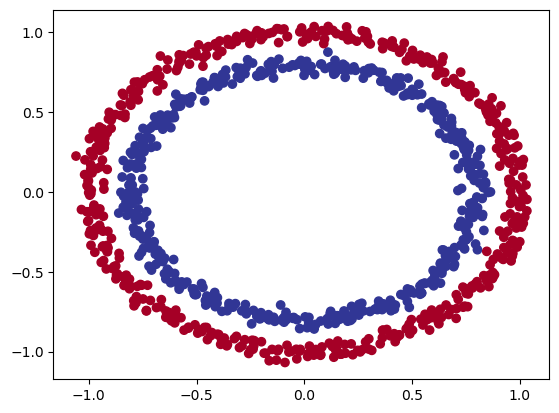

In [4]:
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

Note: This is a toy data set, it is a dataset that is small enough to experiment but sizeable eniough to practice the fundamentals

## Check input output shapes


In [5]:
X.shape, y.shape

((1000, 2), (1000,))

In [6]:
# First example of features and labels

X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample}, and y: {y_sample}")
print(f"Shape of X: {X.shape} and y: {y.shape}")

Values for one sample of X: [0.75424625 0.23148074], and y: 1
Shape of X: (1000, 2) and y: (1000,)


## Turn data into tensor and create train and test splits

In [7]:
torch.__version__

'2.4.0.dev20240528'

In [8]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
device

device(type='cuda')

In [9]:
X = torch.from_numpy(X).type(torch.float).to(device=device)
y = torch.from_numpy(y).type(torch.float).to(device=device)

X, y

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         ...,
         [-0.1369, -0.8100],
         [ 0.6704, -0.7675],
         [ 0.2811,  0.9638]], device='cuda:0'),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
         1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
         1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
         0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
         1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
         0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
         0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
         1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
         1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,

In [10]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [11]:
# Split data into training and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 20 % of data will be test size
                                                    random_state=RANDOM_SEED
                                                    )
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## Building the model

Model will classify between blue and red dots

Steps that can be followed
* Setup device agnostic code
* Construct a model by extending nn.Module
* define loss function and optimizer
* create training and testing loops


In [12]:
# Extend and implement forward
# define nn.Linear() layers that are capable of handling shapes of our data

class CircleModelV0(nn.Module):
  def __init__(self, *args, **kwargs) -> None:
    super().__init__(*args, **kwargs)

    # rul of thumb more features more 
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscales to 5 features
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features outputs features shape as Y
  
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.layer_2(self.layer_1(x))

# Instantiate an instance
model_0 = CircleModelV0().to(device=device)

In [13]:
# another way to create the same model
model_0_v1 = nn.Sequential(nn.Linear(in_features=2, out_features=5),
              nn.Linear(in_features=5, out_features=1)
              ).to(device)

In [14]:
model_0, model_0_v1

(CircleModelV0(
   (layer_1): Linear(in_features=2, out_features=5, bias=True)
   (layer_2): Linear(in_features=5, out_features=1, bias=True)
 ),
 Sequential(
   (0): Linear(in_features=2, out_features=5, bias=True)
   (1): Linear(in_features=5, out_features=1, bias=True)
 ))

In [15]:
# Prediction
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.0258,  0.4430],
                      [-0.1644,  0.4413],
                      [ 0.2053,  0.2834],
                      [-0.3186, -0.4832],
                      [-0.4476,  0.1467]], device='cuda:0')),
             ('layer_1.bias',
              tensor([ 0.3992,  0.5418, -0.1706, -0.2586, -0.3387], device='cuda:0')),
             ('layer_2.weight',
              tensor([[-0.1612, -0.3822, -0.1244,  0.1244, -0.1170]], device='cuda:0')),
             ('layer_2.bias', tensor([0.1540], device='cuda:0'))])

In [16]:
with torch.inference_mode():

  untrained_pred = model_0(X_test)

print(f"Length of predictions: {len(untrained_pred)}, Shape: {untrained_pred.shape}")
print (f"Length of test predictions {len(X_test)}, Shape: {X_test.shape}")
print(f"\n First 10 predictions: ]n {untrained_pred[:10]}")
print(f"\nFirst 10 labels: {y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test predictions 200, Shape: torch.Size([200, 2])

 First 10 predictions: ]n tensor([[-0.3498],
        [-0.4264],
        [-0.0159],
        [-0.4450],
        [ 0.1953],
        [ 0.1469],
        [-0.2363],
        [-0.1015],
        [-0.0253],
        [-0.4292]], device='cuda:0')

First 10 labels: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0')


In [17]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

## Setup loss function and optimizer

Linear regression we might want MAE or MSE loss function
For classification we will need cross entropy based loss function
we will select torch.nn.BCEWithLogitsLoss()

for optimizers we will use the most common ones SGD or Adam (a version of gradient descent)

In [18]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

We need an **evaluation metric**. It can be used to offer another perspective on how our model is going. Loss function measures how wrong the model is, evaluation metrics as measures how right our model is.

accuraccy can be measured by total number of correct predictions over the total number of predictions


In [19]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() will calculate total number of true values
  acc = (correct/len(y_pred)) * 100
  return acc

## Train model

Training loop
1. Forward pass
2. Calculate loss
3. zero gradients
4. perform backpropagation on the loss
5. Step the optimizer

In [20]:
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))
y_logits[:5]

tensor([[-0.3498],
        [-0.4264],
        [-0.0159],
        [-0.4450],
        [ 0.1953]], device='cuda:0')

In [21]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs[:5]

tensor([[0.4134],
        [0.3950],
        [0.4960],
        [0.3906],
        [0.5487]], device='cuda:0')

In [22]:
torch.round(y_logits)

tensor([[-0.],
        [-0.],
        [-0.],
        [-0.],
        [0.],
        [0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [0.],
        [0.],
        [-0.],
        [0.],
        [-0.],
        [-0.],
        [-0.],
        [0.],
        [-0.],
        [-0.],
        [-0.],
        [0.],
        [0.],
        [0.],
        [-0.],
        [-0.],
        [-0.],
        [0.],
        [-0.],
        [-0.],
        [0.],
        [-0.],
        [-0.],
        [0.],
        [-0.],
        [-0.],
        [0.],
        [0.],
        [-0.],
        [0.],
        [-0.],
        [0.],
        [-0.],
        [-0.],
        [0.],
        [-0.],
        [-0.],
        [0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],


In [23]:
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)

epochs = 100

for epoch in range(epochs):
  model_0.train()
   
  # forward pass
  y_logits = model_0(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))
  # calculate loss/accuracy
  # we are using BCELogitsLoss so the preds are y_logits for this loss_fn
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_pred=y_preds, y_true=y_train)
  # optimizer zero grad
  optimizer.zero_grad()
  # back propogation
  loss.backward()
  # optimizer step
  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_pred=test_pred, y_true=y_test)
  
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%") 

Epoch: 0 | Loss: 0.70229, Accuracy: 48.38% | Test Loss: 0.69394, Test acc: 51.50%
Epoch: 10 | Loss: 0.69999, Accuracy: 48.50% | Test Loss: 0.69256, Test acc: 53.00%
Epoch: 20 | Loss: 0.69865, Accuracy: 49.38% | Test Loss: 0.69199, Test acc: 52.00%
Epoch: 30 | Loss: 0.69776, Accuracy: 49.25% | Test Loss: 0.69176, Test acc: 50.50%
Epoch: 40 | Loss: 0.69710, Accuracy: 49.62% | Test Loss: 0.69167, Test acc: 51.00%
Epoch: 50 | Loss: 0.69657, Accuracy: 49.75% | Test Loss: 0.69165, Test acc: 51.00%
Epoch: 60 | Loss: 0.69613, Accuracy: 49.62% | Test Loss: 0.69167, Test acc: 51.00%
Epoch: 70 | Loss: 0.69576, Accuracy: 49.75% | Test Loss: 0.69171, Test acc: 50.00%
Epoch: 80 | Loss: 0.69544, Accuracy: 50.00% | Test Loss: 0.69176, Test acc: 50.00%
Epoch: 90 | Loss: 0.69517, Accuracy: 50.12% | Test Loss: 0.69183, Test acc: 51.00%


## Make predictions ad evaluate the model

From the metrics it looks like model is not learning anything, lets plot the points and verify


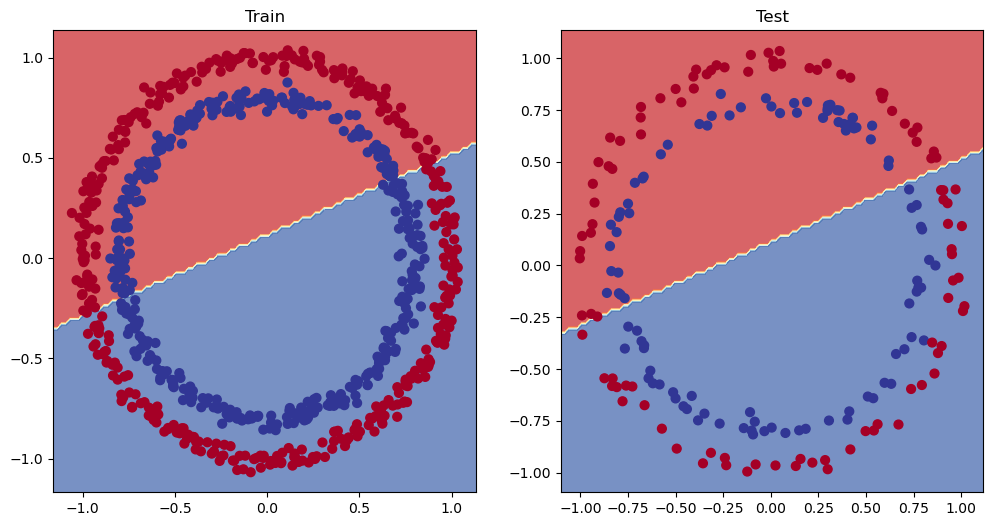

In [24]:
# plot_decisions 
from helper_functions import plot_decision_boundary, plot_predictions

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## Improving a model

* Add more layers - 
* Add more hidden units - (go from 0 to 10 hidden uinits)
* Fit for longer (more epocs)
* Changing the activation functions (currently we are using sigmoid for output activation)
* Change the learning rate
* Change the loss function


these suggestions are model specific and these options are values that we can change also known as **hyerparams**

In [25]:
class CircleModelV1(nn.Module):
  def __init__(self, *args, **kwargs) -> None:
    super().__init__(*args, **kwargs)
    self.layer_1 = nn.Linear(in_features=2, out_features=25)
    self.layer_2 = nn.Linear(in_features=25, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device=device)
model_1


CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=25, bias=True)
  (layer_2): Linear(in_features=25, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [26]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [27]:
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)

epochs = 1000

X_train , y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  #training
  model_1.train()
  # forward pass
  y_logits = model_1(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))
  # calculate loss
  loss = loss_fn(y_logits, y_train)

  # zero grad
  optimizer.zero_grad()
  # back propogation
  loss.backward()
  acc = accuracy_fn(y_true=y_train, y_pred=y_preds)
  # optimizer step
  optimizer.step()

  model_1.eval()

  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_preds)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | loss: {loss:.5f} | Acc: {acc:.2f}% | Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")

Epoch: 0 | loss: 0.69540 | Acc: 50.00% | Test loss: 0.70226 | Test acc: 48.50%
Epoch: 100 | loss: 0.69460 | Acc: 50.62% | Test loss: 0.70059 | Test acc: 47.50%
Epoch: 200 | loss: 0.69410 | Acc: 50.75% | Test loss: 0.69938 | Test acc: 47.50%
Epoch: 300 | loss: 0.69376 | Acc: 50.62% | Test loss: 0.69847 | Test acc: 47.50%
Epoch: 400 | loss: 0.69353 | Acc: 50.50% | Test loss: 0.69777 | Test acc: 47.00%
Epoch: 500 | loss: 0.69337 | Acc: 50.88% | Test loss: 0.69722 | Test acc: 47.50%
Epoch: 600 | loss: 0.69326 | Acc: 51.00% | Test loss: 0.69678 | Test acc: 47.00%
Epoch: 700 | loss: 0.69318 | Acc: 50.88% | Test loss: 0.69642 | Test acc: 47.50%
Epoch: 800 | loss: 0.69312 | Acc: 51.25% | Test loss: 0.69614 | Test acc: 46.50%
Epoch: 900 | loss: 0.69308 | Acc: 50.88% | Test loss: 0.69590 | Test acc: 46.00%


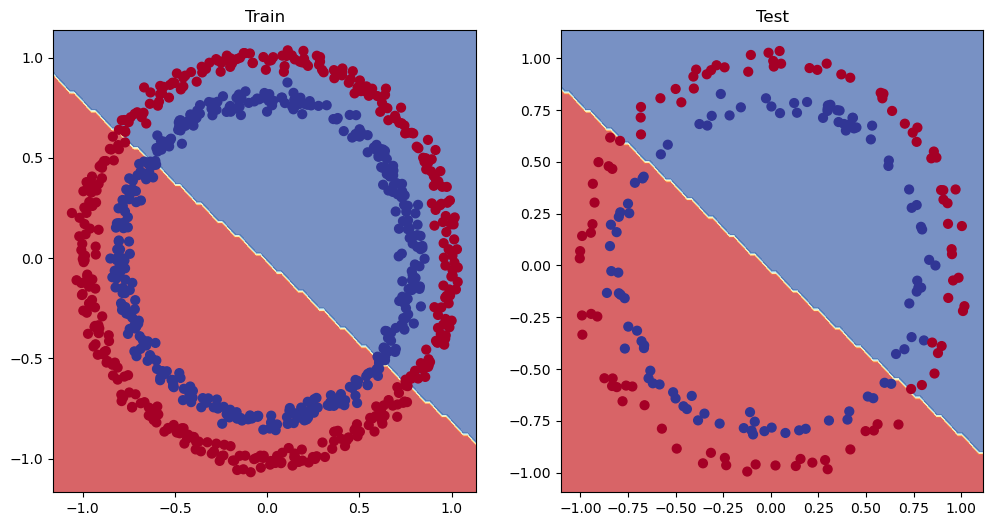

In [28]:
# plot decision boundary

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1,X_test, y_test)

### Lets start with non linear functions

recreatemnon lineardata


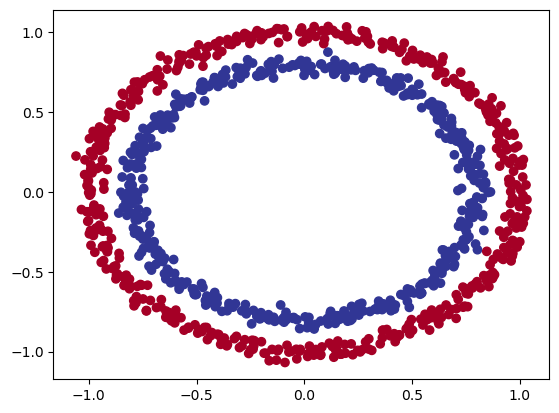

In [29]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles


n_samples = 1000
X,y = make_circles(n_samples=n_samples, noise=0.03, random_state=RANDOM_SEED)

plt.scatter(X[:,0], X[:, 1], c = y, cmap=plt.cm.RdYlBu)


In [30]:
# conver data to tensors

import torch 
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# split data

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=RANDOM_SEED)
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### Building Non linear Neural network

examples where this could be used for decisionslike
*  spam or not spam
*  credit cards = fraud not found
*  insurance claims = at fault or not fault

In [37]:

model_3 = nn.Sequential(
  nn.Linear(in_features=2, out_features=128),
  nn.ReLU(),
  nn.Linear(in_features=128, out_features=256),
  nn.ReLU(),
  nn.Linear(in_features=256, out_features=64),
  nn.ReLU(),
  nn.Linear(in_features=64, out_features=1)
)
model_3

Sequential(
  (0): Linear(in_features=2, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=1, bias=True)
)

In [38]:
model_3 = model_3.to(device=device)

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(), lr=0.1)


### Training the model


In [39]:
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)

model_3 = model_3.to(device=device)
X_train, y_train = X_train.to(device=device), y_train.to(device=device)
X_test, y_test = X_test.to(device=device), y_test.to(device=device)

epochs = 1000

for epoch in range(epochs):
  ## train
  model_3.train()
  ## forward pass
  y_logits = model_3(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  # calculate loss/accuracy
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_pred=y_preds, y_true=y_train)

  # zero grad
  optimizer.zero_grad()
  # back proagation
  loss.backward()
  # optimizer step
  optimizer.step()

  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_pred=test_preds, y_true=y_test)

  if epoch % 100 == 0:
    print(f"Epoch {epoch} | loss: {loss:.5f} acc:{acc: .2f}% test_loss: {test_loss:.5f} test_acc:{test_acc:.2f}%")
    


Epoch 0 | loss: 0.69388 acc: 50.00% test_loss: 0.69334 test_acc:50.00%
Epoch 100 | loss: 0.68146 acc: 68.75% test_loss: 0.68400 test_acc:67.50%
Epoch 200 | loss: 0.64650 acc: 89.38% test_loss: 0.65448 test_acc:86.00%
Epoch 300 | loss: 0.42504 acc: 99.25% test_loss: 0.46074 test_acc:96.50%
Epoch 400 | loss: 0.37655 acc: 78.12% test_loss: 0.44399 test_acc:69.00%
Epoch 500 | loss: 0.07098 acc: 100.00% test_loss: 0.10211 test_acc:100.00%
Epoch 600 | loss: 0.02460 acc: 100.00% test_loss: 0.04350 test_acc:100.00%
Epoch 700 | loss: 0.01376 acc: 100.00% test_loss: 0.02787 test_acc:100.00%
Epoch 800 | loss: 0.00927 acc: 100.00% test_loss: 0.02094 test_acc:100.00%
Epoch 900 | loss: 0.00693 acc: 100.00% test_loss: 0.01709 test_acc:100.00%


### Evaluate model

In [40]:
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_preds[:10], y_test[:10]


(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

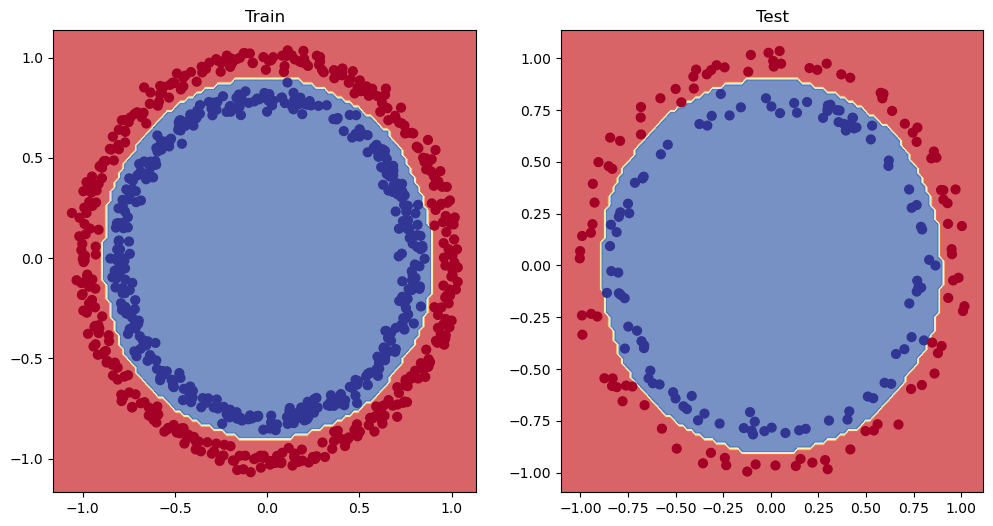

In [41]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model=model_3, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model=model_3, X=X_test,  y=y_test)

### Replicating non-linear activation functions

Neural networks, rather than us telling the model what to learn, we give it the tools to discover patterns in data and it tries to figure out the pattern on its own.

Tools like linear and non linear functions 